In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set(font_path='Arial')

# Enable auto-reload for development
%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA H100 80GB HBM3
    • Total memory: 79.1 GB
    • Compute capability: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



- s1d3: https://figshare.com/ndownloader/files/41932005
- s2d1: https://figshare.com/ndownloader/files/41932011
- s3d7: https://figshare.com/ndownloader/files/41932008

In [3]:
adata1=ov.read('data/neurips2021_s1d3.h5ad')
adata1.obs['batch']='s1d3'
adata2=ov.read('data/neurips2021_s2d1.h5ad')
adata2.obs['batch']='s2d1'
adata3=ov.read('data/neurips2021_s3d7.h5ad')
adata3.obs['batch']='s3d7'

In [4]:
adata=sc.concat([adata1,adata2,adata3],merge='same')
adata

AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

## scGPT

we need to download the model checkpoint from here: https://drive.google.com/drive/folders/1oWh_-ZRdhtoGQ2Fw24HP41FgLoomVo-y/

In [5]:
#!/usr/bin/env python3
import os
import gdown

folder_url = 'https://drive.google.com/drive/folders/1oWh_-ZRdhtoGQ2Fw24HP41FgLoomVo-y'

output_dir = 'llm_model/models/scgpt'

os.makedirs(output_dir, exist_ok=True)

gdown.download_folder(
    url=folder_url,
    output=output_dir,
    quiet=False,        # 显示下载进度
    use_cookies=False   # 根据需要切换
)

Retrieving folder contents


Processing file 1hh2zGKyWAx3DyovD30GStZ3QlzmSqdk1 args.json
Processing file 14AebJfGOUF047Eg40hk57HCtrb0fyDTm best_model.pt
Processing file 1H3E_MJ-Dl36AQV6jLbna2EdvgPaqvqcC vocab.json


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hh2zGKyWAx3DyovD30GStZ3QlzmSqdk1
To: /scratch/users/steorra/analysis/25_scllm/llm_model/models/scgpt/args.json
100%|██████████| 1.30k/1.30k [00:00<00:00, 11.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14AebJfGOUF047Eg40hk57HCtrb0fyDTm
From (redirected): https://drive.google.com/uc?id=14AebJfGOUF047Eg40hk57HCtrb0fyDTm&confirm=t&uuid=bce7552f-cae8-4820-9be5-29a0beb12b2a
To: /scratch/users/steorra/analysis/25_scllm/llm_model/models/scgpt/best_model.pt
100%|██████████| 205M/205M [00:04<00:00, 43.6MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1H3E_MJ-Dl36AQV6jLbna2EdvgPaqvqcC
To: /scratch/users/steorra/analysis/25_scllm/llm_model/models/scgpt/vocab.json
100%|██████████| 1.32M/1.32M [00:00<00:00, 15.2MB/s]
Download completed


['llm_model/models/scgpt/args.json',
 'llm_model/models/scgpt/best_model.pt',
 'llm_model/models/scgpt/vocab.json']

In [6]:
manager = ov.external.scllm.SCLLMManager(
    model_type="scgpt",
    model_path="llm_model/models/scgpt",
)

Loaded vocabulary with 60697 genes
Loaded model config from llm_model/models/scgpt/args.json
Key config parameters:
  embsize: 512
  nheads: 8
  d_hid: 512
  nlayers: 12
  n_layers_cls: 3
Analyzing model checkpoint for n_cls inference...
  encoder.embedding.weight: torch.Size([60697, 512])
  encoder.enc_norm.weight: torch.Size([512])
  encoder.enc_norm.bias: torch.Size([512])
  flag_encoder.weight: torch.Size([2, 512])
  value_encoder.linear1.weight: torch.Size([512, 1])
  value_encoder.linear1.bias: torch.Size([512])
  value_encoder.linear2.weight: torch.Size([512, 512])
  value_encoder.linear2.bias: torch.Size([512])
  value_encoder.norm.weight: torch.Size([512])
  value_encoder.norm.bias: torch.Size([512])
  transformer_encoder.layers.0.self_attn.Wqkv.weight: torch.Size([1536, 512])
  transformer_encoder.layers.0.self_attn.Wqkv.bias: torch.Size([1536])
  transformer_encoder.layers.0.self_attn.out_proj.weight: torch.Size([512, 512])
  transformer_encoder.layers.0.self_attn.out_proj.b

In [7]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',
                       n_HVGs=3000,batch_key=None,target_sum=1e4)
adata

Begin robust gene identification
After filtration, 13953/13953 genes are kept.     Among 13953 genes, 13953 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell
The following highly-expressed genes are not considered during normalization factor computation:
['IGKC', 'HBB', 'MALAT1', 'IGHA1', 'IGHM', 'HBA2', 'IGLC1', 'IGLC2', 'IGLC3']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 2.811250686645508 seconds.
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [8]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

View of AnnData object with n_obs × n_vars = 27423 × 3000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

### zero-shot embedding

Filtering genes by vocabulary...
Matched 2738/3000 genes in vocabulary
After vocabulary filtering: 2738 genes retained
Initialized preprocessor with Tutorial settings:
  n_bins: 51
  normalize_total: 10000.0
  log1p: True
  data_is_raw: True
Data inspection:
  Cell total counts - Mean: 1085.7, Median: 1128.2
  Data range: [0.000, 11.615]
  Data type: float32
  🔍 Auto-detected: Data appears to be raw counts
  ⚡ User override: SKIPPING normalization
  🔄 Adjusting preprocessor to skip normalization...
  🔄 Also skipping log1p (data appears log-transformed)
  Modified settings: normalize_total=None, log1p=False
Applying preprocessing pipeline...
Binning data ...
  ✓ Restored original preprocessor settings
Preprocessing completed
Final binned data shape: (27423, 2738)
Final binned data range: [0.000, 50.000]
Unique values in binned data: 51
Binned values range: [0 1 2 3 4]...[46 47 48 49 50] (showing first and last 5)
Input data shape: (27423, 2738)
Input data range: [0.000, 50.000]
Gene IDs

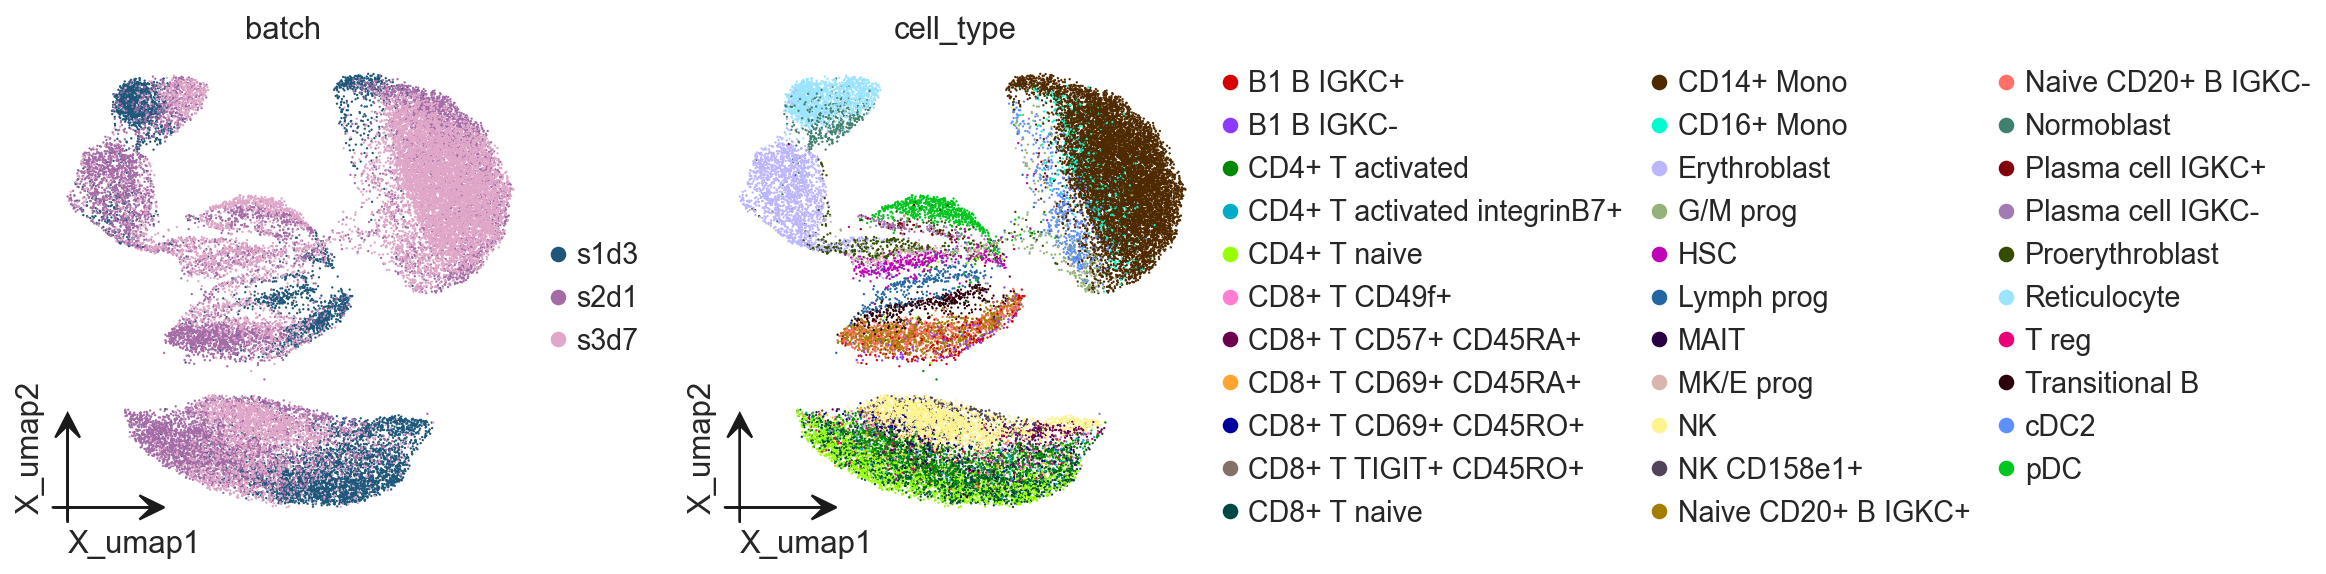

In [9]:
embeddings = manager.get_embeddings(adata,skip_normalization=True,)
print(f"embedding: {embeddings.shape}")

adata.obsm['X_scgpt'] = embeddings

sc.pp.neighbors(adata, use_rep='X_scgpt')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

## fine-tune

In [10]:
reference_adata=adata[adata.obs['batch']=='s1d3']

In [11]:
reference_adata.obs['celltype']=reference_adata.obs['cell_type'].copy()

In [12]:
fine_tune_results = manager.model.fine_tune(
    train_adata=reference_adata,
    epochs=5,           # 
    batch_size=32,       # 
    lr=1e-4,            # 
    mask_ratio=0.0,      # 
    data_is_raw=False,
    log1p=False,
    skip_normalization=True,
)


🚀 Starting fine-tuning for annotation task...
Found 30 cell types: ['B1 B IGKC+', 'B1 B IGKC-', 'CD4+ T activated', 'CD4+ T activated integrinB7+', 'CD4+ T naive', 'CD8+ T CD49f+', 'CD8+ T CD57+ CD45RA+', 'CD8+ T CD69+ CD45RA+', 'CD8+ T CD69+ CD45RO+', 'CD8+ T TIGIT+ CD45RO+', 'CD8+ T naive', 'CD14+ Mono', 'CD16+ Mono', 'Erythroblast', 'G/M prog', 'HSC', 'Lymph prog', 'MAIT', 'MK/E prog', 'NK', 'Naive CD20+ B IGKC+', 'Naive CD20+ B IGKC-', 'Normoblast', 'Plasma cell IGKC+', 'Proerythroblast', 'Reticulocyte', 'T reg', 'Transitional B', 'cDC2', 'pDC']
Filtering genes by vocabulary...
Matched 2738/3000 genes in vocabulary
After vocabulary filtering: 2738 genes retained
Data inspection:
  Cell total counts - Mean: 1013.7, Median: 1113.8
  Data range: [0.000, 11.387]
  Data type: float32
  🔍 Auto-detected: Data appears to be raw counts
  ⚡ User override: SKIPPING normalization
  🔄 Adjusting preprocessor to skip normalization...
  🔄 Also skipping log1p (data appears log-transformed)
  Modifi

In [13]:
zero_shot_results = manager.model.integrate(
    adata,
    batch_key="batch",
    correction_method="mnn",
    log1p=False,
    data_is_raw=False,
    skip_normalization=True,
)
adata.obsm['X_scgpt_fine'] = zero_shot_results['embeddings']

🔄 Using pre-trained model with post-hoc batch correction...
   Extracting pre-trained cell embeddings...
Filtering genes by vocabulary...
Matched 2738/3000 genes in vocabulary
After vocabulary filtering: 2738 genes retained
Data inspection:
  Cell total counts - Mean: 1085.7, Median: 1128.2
  Data range: [0.000, 11.615]
  Data type: float32
  🔍 Auto-detected: Data appears to be raw counts
  ⚡ User override: SKIPPING normalization
  🔄 Adjusting preprocessor to skip normalization...
  🔄 Also skipping log1p (data appears log-transformed)
  Modified settings: normalize_total=None, log1p=False
Applying preprocessing pipeline...
Binning data ...
  ✓ Restored original preprocessor settings
Preprocessing completed
Final binned data shape: (27423, 2738)
Final binned data range: [0.000, 50.000]
Unique values in binned data: 51
Binned values range: [0 1 2 3 4]...[46 47 48 49 50] (showing first and last 5)
Input data shape: (27423, 2738)
Input data range: [0.000, 50.000]
Gene IDs shape: (2738,), r

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:16)


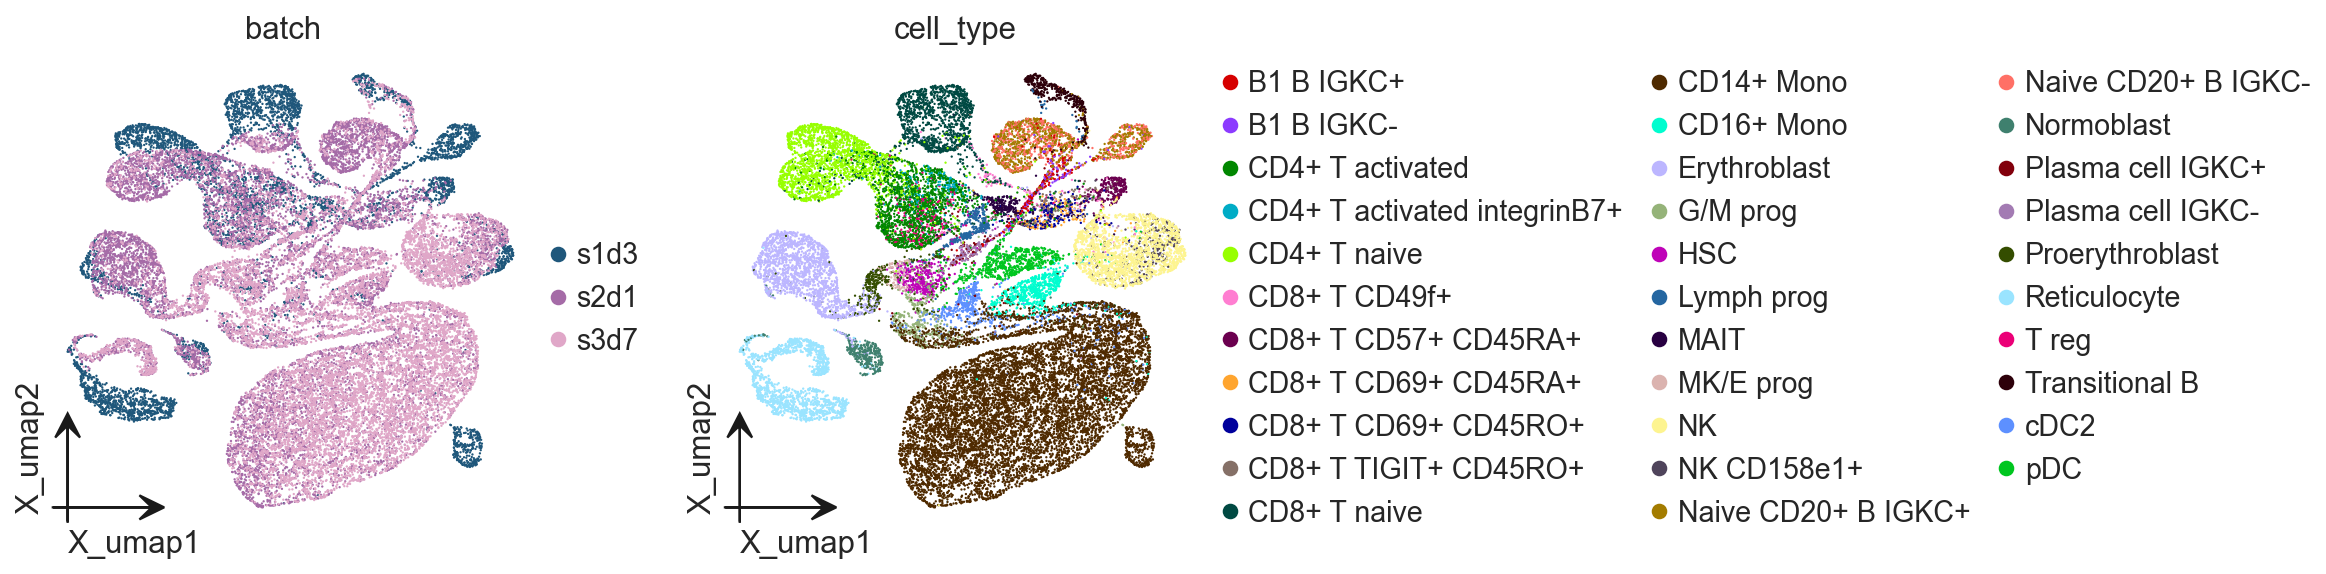

In [14]:
sc.pp.neighbors(adata, use_rep='X_scgpt_fine')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

### annotation

In [15]:
prediction_results = manager.model.predict_celltypes(
    adata,
    skip_normalization=True,
)

adata.obs['predicted_celltype'] = prediction_results['predicted_celltypes']
adata.obs['predicted_celltype_id'] = prediction_results['predictions']

🔍 Predicting cell types for query data...
Filtering genes by vocabulary...
Matched 2738/3000 genes in vocabulary
After vocabulary filtering: 2738 genes retained
Data inspection:
  Cell total counts - Mean: 1085.7, Median: 1128.2
  Data range: [0.000, 11.615]
  Data type: float32
  🔍 Auto-detected: Data appears to be raw counts
  ⚡ User override: SKIPPING normalization
  🔄 Adjusting preprocessor to skip normalization...
  🔄 Also skipping log1p (data appears log-transformed)
  Modified settings: normalize_total=None, log1p=False
Applying preprocessing pipeline...
Binning data ...
  ✓ Restored original preprocessor settings
Preprocessing completed
Final binned data shape: (27423, 2738)
Final binned data range: [0.000, 50.000]
Unique values in binned data: 51
Binned values range: [0 1 2 3 4]...[46 47 48 49 50] (showing first and last 5)
Input data shape: (27423, 2738)
Input data range: [0.000, 50.000]
Gene IDs shape: (2738,), range: [3, 45372]
Tokenizing data...
Tokenized genes shape: torc

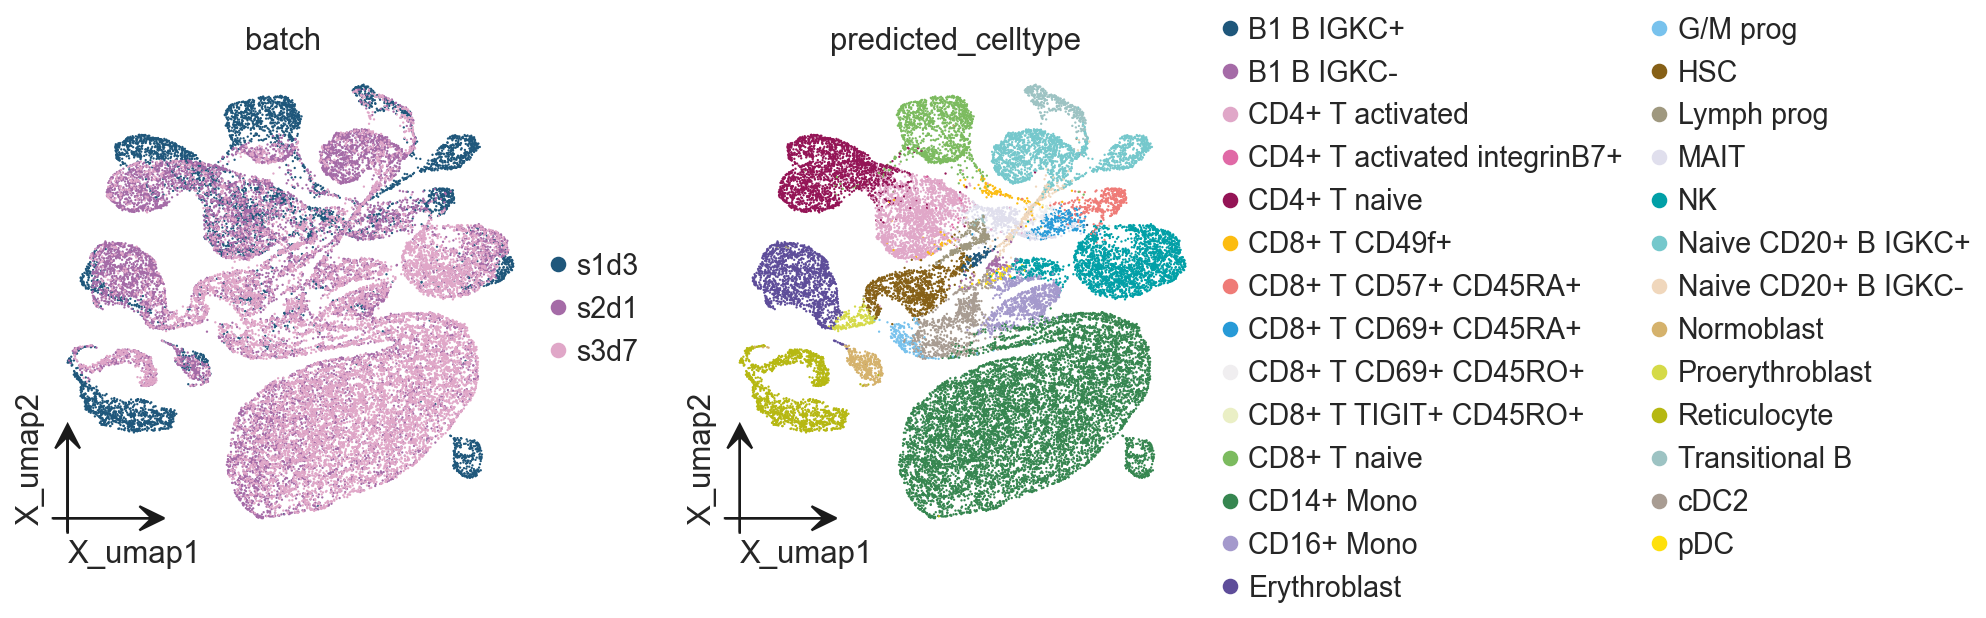

In [16]:
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'predicted_celltype']
)